In [2]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
#Counter(df['Loan_Status'])['Y']/df['Loan_Status'].size
#df.describe()

In [5]:
pre_y = df['Loan_Status']
pre_x = df.drop('Loan_Status', axis=1)
dm_x = pd.get_dummies(pre_x)
dm_y = pre_y.map(dict(Y=1, N=0))

In [6]:
smote = SMOTE(sampling_strategy='minority')
x1, y = smote.fit_resample(dm_x, dm_y)
ac = MinMaxScaler()
x = ac.fit_transform(x1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12, shuffle=True)

In [8]:
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=x_test.shape[1]))
model.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=20, epochs=100, verbose=0)
eval_model= model.evaluate(x_train, y_train)
eval_model

17/17 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8908


[0.2926803231239319, 0.8907721042633057]

In [9]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.58)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

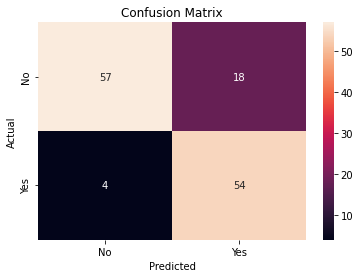

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [11]:
import pickle
import joblib
filename = 'Loan_model.pkl'
joblib.dump(model, filename)

['Loan_model.pkl']